# Anomaly Detection

## Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


### Acquire

In [14]:
df = pd.read_csv('anonymized-curriculum-access.txt.gz', compression='gzip', 
                                 header=None, sep=' ')

In [15]:
df.head()

,0,1,2,3,4,5
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       900223 non-null  object 
 1   1       900223 non-null  object 
 2   2       900222 non-null  object 
 3   3       900223 non-null  int64  
 4   4       847330 non-null  float64
 5   5       900223 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 41.2+ MB


In [21]:
df[4].value_counts()

28.0     84031
33.0     40730
29.0     38096
62.0     37109
53.0     36902
24.0     35636
57.0     33844
56.0     33568
51.0     32888
59.0     32015
22.0     30926
58.0     29855
32.0     29356
23.0     28534
52.0     28033
26.0     27749
34.0     26538
25.0     25586
31.0     25359
132.0    23691
55.0     21582
27.0     20743
61.0     17713
134.0    16623
135.0    16397
133.0    14715
14.0      9587
1.0       8890
137.0     8562
21.0      7444
138.0     7276
17.0      4954
13.0      2845
18.0      2158
8.0       1712
139.0     1672
19.0      1237
16.0       755
15.0       691
7.0        598
12.0       302
11.0       253
2.0         93
6.0         72
9.0          5
4.0          4
5.0          1
Name: 4, dtype: int64

In [49]:
df.columns = ['date', 'time', 'page_visited', 'user_id', 'cohort_id', 'ip']

In [61]:
df.index = pd.to_datetime(df.date + " " + df.time)

In [62]:
df.head(11)

,date,time,page_visited,user_id,cohort_id,ip
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
2018-01-26 09:56:41,2018-01-26,09:56:41,javascript-i/loops,2,22.0,97.105.19.61
2018-01-26 09:56:46,2018-01-26,09:56:46,javascript-i/conditionals,3,22.0,97.105.19.61
2018-01-26 09:56:48,2018-01-26,09:56:48,javascript-i/functions,3,22.0,97.105.19.61
2018-01-26 09:56:59,2018-01-26,09:56:59,javascript-i/loops,2,22.0,97.105.19.61
2018-01-26 09:58:26,2018-01-26,09:58:26,javascript-i/functions,4,22.0,97.105.19.61


In [63]:
df.user_id.value_counts()

11     17913
64     16347
53     12329
314     7783
1       7404
       ...  
952        1
212        1
940        1
649        1
879        1
Name: user_id, Length: 981, dtype: int64

In [64]:
df.groupby(['page_visited', 'cohort_id']).user_id.value_counts()

page_visited                      cohort_id  user_id
%20https://github.com/RaulCPena   55.0       580        1
'                                 28.0       64         1
,%20https://github.com/RaulCPena  55.0       580        1
.git                              24.0       203        1
.gitignore                        24.0       203        1
                                                       ..
working-with-time-series-data     59.0       680        2
                                             692        2
                                             688        1
wp-admin                          22.0       180        1
wp-login                          22.0       180        1
Name: user_id, Length: 109918, dtype: int64

In [67]:
df.to_csv('anomaly.csv')

In [113]:
# dont push to git 
lori = df[(df.ip == 'secret')]

In [60]:
df.groupby('user_id')['ip'].size()

user_id
1      7404
2      1541
3      1562
4       692
5      1701
       ... 
977      86
978      55
979     127
980       3
981      42
Name: ip, Length: 981, dtype: int64

In [70]:
df['cohort_id'] = df.cohort_id.fillna(0)

In [78]:
no_cohort = df[df.cohort_id == 0]

In [110]:
no_cohort.head(30)

,date,time,page_visited,user_id,cohort_id,ip
2018-01-26 16:46:16,2018-01-26,16:46:16,/,48,0.0,97.105.19.61
2018-01-26 16:46:24,2018-01-26,16:46:24,spring/extra-features/form-validation,48,0.0,97.105.19.61
2018-01-26 17:54:24,2018-01-26,17:54:24,/,48,0.0,97.105.19.61
2018-01-26 18:32:03,2018-01-26,18:32:03,/,48,0.0,97.105.19.61
2018-01-26 18:32:17,2018-01-26,18:32:17,mysql/relationships/joins,48,0.0,97.105.19.61
2018-01-26 18:32:33,2018-01-26,18:32:33,mysql/tables,48,0.0,97.105.19.61
2018-01-26 18:32:37,2018-01-26,18:32:37,mysql/databases,48,0.0,97.105.19.61
2018-01-26 18:32:43,2018-01-26,18:32:43,mysql/relationships,48,0.0,97.105.19.61
2018-01-26 18:32:47,2018-01-26,18:32:47,mysql/relationships/joins,48,0.0,97.105.19.61
2018-01-26 18:33:07,2018-01-26,18:33:07,mysql/relationships,48,0.0,97.105.19.61


In [81]:
no_cohort.user_id.value_counts(sort=True)

354    2965
736    2358
363    2248
716    2136
368    2085
       ... 
644       6
62        4
663       4
176       3
89        3
Name: user_id, Length: 78, dtype: int64

In [102]:
user_354 = no_cohort[(no_cohort.user_id == 663)]

array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'cohort_id'}>]], dtype=object)

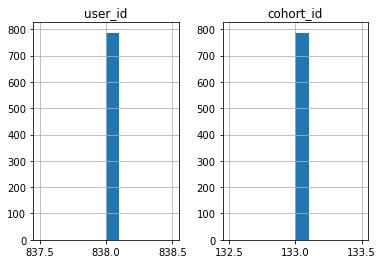

In [114]:
lori.hist()

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1136: UserWarning: Attempting to set identical left == right == 18464.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1136: UserWarning: Attempting to set identical left == right == 18464.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


<AxesSubplot:>

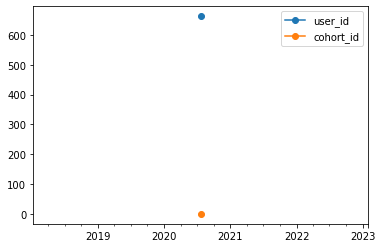

In [104]:
user_354.resample('D').mean().plot(marker='o')

In [119]:
df.query('user_id == 838')['ip'].value_counts()

99.158.249.67     787
104.189.74.143     11
Name: ip, dtype: int64

In [118]:
df.query('user_id==717')['ip'].value_counts()

136.50.57.27      376
136.50.23.183     321
136.50.22.105     177
136.50.18.157     125
136.50.61.147     114
136.50.29.154     107
136.50.102.126     42
136.50.28.7        23
136.50.87.115      12
136.50.81.32       10
136.50.23.208       5
136.50.80.55        5
Name: ip, dtype: int64

In [122]:
df.query('cohort_id==130')['ip'].value_counts()

Series([], Name: ip, dtype: int64)

<AxesSubplot:>

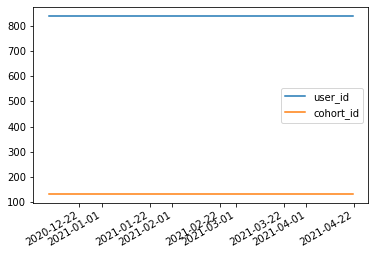

In [124]:
lori.plot()

<AxesSubplot:>

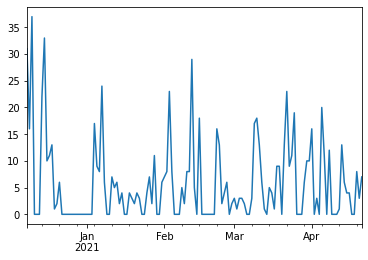

In [129]:
lori.ip.resample('d').count().plot()

In [130]:
matthew = df[(df.ip == 'secret')]

<AxesSubplot:>

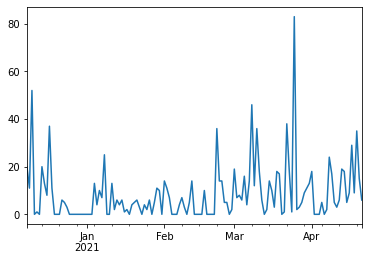

In [131]:
matthew.ip.resample('d').count().plot()

### Tableau Practice
https://public.tableau.com/profile/lori.segovia#!/vizhome/Practicewithanomalydataset/Sheet3